# Tabla de contenido: <a id='back'></a>

* [Descripcion del proyecto](#project_description)
* [Objetivo](#objective)
* [Inicializacion](#start)
    * [Exploracion del dataset](#data_exploration)
        * [Dataset completo](#data_full_1)
        * [Dataset de entrenamiento](#data_train_1)
        * [Dataset de prueba](#data_test_1)
        * [Hallazgos](#review)
    * [Descripcion de datos](#data_description)
* [Pre Procesamiento de datos](#data_preprocess)
    * [Identificacion de columnas](#columns)
    * [Tratamiento de valores ausentes](#nan_values)
        * [Dataset completo](#data_full_2)
        * [Dataset de entrenamiento](#data_train_2)
        * [Dataset de prueba](#data_test_2)
        * [Eliminacion de valores ausentes](#drop_nan)        
* [Analisis de datos](#data_analysis)
    * [Validacion de calculo de recuperacion](#recovery_calculation)
    * [Analisis de la concentracion de metales](#concentration_analysis)
    * [Analisis de distribucion de particulas de alimentacion](#feed_analysis)
    * [Analisis de valores anomalos en cada etapa](#rare_values_analysis)
* [Preparacion para entrenamiento](#prep_train)
    * [Calculo de Error Medio Absoluto Simetrico (sMAPE)](#smape_estimation)
    * [Homologacion de columnas de conjunto de pruebas](#test_columns)
    * [Definicion de variables y segmentacion de datos](#variables_split)
* [Validacion cruzada](#rcross_validation)
    * [Decision Tree Regressor](#decision_tree)
    * [Random Forest Regressor](#random_forest)
    * [Linear Regressor](#linear_regressor)
    * [Conclusion](#review_2)
* [Entrenamos el mejor modelo](#model_train)
* [Probamos el mejor modelo](#test_model)
* [Prediccion de la recuperacion de oro](#prediction_review)
* [Conclusiones](#end)

# Descripcion del proyecto <a id='project_description'></a>
Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.
Los datos se almacenan en tres archivos:

- `gold_recovery_train.csv` — el dataset de entrenamiento 
- `gold_recovery_test.csv` —el dataset de prueba 
- `gold_recovery_full.csv` — el dataset fuente 

Los datos se indexan con la fecha y la hora de adquisición (`date`). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Tienes a tu disposición los datos en bruto que solamente fueron descargados del almacén de datos. Antes de construir el modelo, comprueba que los datos sean correctos. Para ello, utiliza nuestras instrucciones.

## Objetivo <a id='objective'></a>

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

Tendrás que:

1. preparar los datos;
2. realizar el análisis de datos;
3. desarrollar un modelo y entrenarlo.

# Inicializacion <a id='start'></a>

In [281]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [282]:
# Importamos los datasets

df_full = pd.read_csv('.\datasets\gold_recovery_full.csv')
df_test = pd.read_csv('.\datasets\gold_recovery_test.csv')
df_train = pd.read_csv('.\datasets\gold_recovery_train.csv')



### Exploracion del dataset <a id='data_exploration'></a>
A continuacion, revisaremos si el dataset se encuentra limpio y listo para trabajar.

#### Dataset completo <a id='data_full_1'></a>

In [283]:
# Revision de la informacion del dataset
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [284]:
# Mostramos las primeras filas
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [285]:
# Validamos si existen filas duplicadas
df_full.duplicated().sum()

0

In [286]:
# Validamos si existen valores nulos
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [287]:
df_full[df_full['final.output.concentrate_au'].isna()]


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,2016-04-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,2018-05-17 14:59:59,NaN,NaN,NaN,NaN,NaN,10.973703,1.956650,NaN,5.205719,...,30.016229,-398.270850,22.002711,-499.522602,24.980643,-499.283705,22.984288,-500.059916,25.013956,-500.408074
20488,2018-05-17 15:59:59,NaN,NaN,NaN,NaN,NaN,9.987548,1.440766,4.277092,4.050977,...,29.954721,-398.425395,21.946049,-500.062361,24.992471,-500.467714,22.978081,-499.791793,24.992488,-500.157939
22008,2018-07-19 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22009,2018-07-20 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset de entrenamiento <a id='data_train_1'></a>

In [288]:
# Revision de la informacion del dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [289]:
# Mostramos las primeras filas
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [290]:
# Validamos si existen filas duplicadas
df_train.duplicated().sum()

0

In [291]:
# Validamos si existen valores nulos
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

#### Dataset de prueba <a id='data_test_1'></a>

In [292]:
# Revision de la informacion del dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [293]:
# Mostramos las primeras filas
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [294]:
# Validamos si existen filas duplicadas
df_test.duplicated().sum()

0

In [295]:
# Validamos si existen valores nulos
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


#### Hallazgos <a id='review'></a>

En el dataset de entrenamiento `df_full` se observa lo siguiente:
- Tiene 87 columnas y 22716 filas.
- Presenta valores nulos en diferentes columnas. 
- Mo contiene valores duplicados

En el dataset de entrenamiento `df_train` se observa lo siguiente:
- Tiene 87 columnas y 16860 filas.
- Presenta valores nulos en diferentes columnas. 
- Mo contiene valores duplicados

En el dataset de entrenamiento `df_test` se observa lo siguiente:
- Tiene 53 columnas y 5856 filas.
- Presenta valores nulos en diferentes columnas. 
- Mo contiene valores duplicados

## Descripción de datos <a id='data_description'></a>

**Proceso tecnológico**

- *Rougher feed* — materia prima
- *Rougher additions* (o *adiciones de reactivos*) - reactivos de flotación: *xantato, sulfato, depresante*
    - *Xantato* — promotor o activador de la flotación
    - *Sulfato* — sulfuro de sodio para este proceso en particular
    - *Depresante* — silicato de sodio
- *Rougher process* — flotación
- *Rougher tails* — residuos del producto
- *Float banks* — instalación de flotación
- *Cleaner process* — purificación
- *Rougher Au* — concentrado de oro rougher
- *Final Au* — concentrado de oro final

**Parámetros de las etapas**

- *air amount* — volumen de aire
- *fluid levels*
- *feed size* — tamaño de las partículas de la alimentación
- *feed rate*

**Denominación de las características**

Así es como se denominan las características:

`[stage].[parameter_type].[parameter_name]`

Ejemplo: `rougher.input.feed_ag`

Valores posibles para `[stage]`:

- *rougher* — flotación
- *primary_cleaner* — purificación primaria
- *secondary_cleaner* — purificación secundaria
- *final* — características finales

Valores posibles para `[parameter_type]`:

- *input* — parámetros de la materia prima
- *output* — parámetros del producto
- *state* — parámetros que caracterizan el estado actual de la etapa
- *calculation* — características de cálculo

# Pre procesamiento de los datos <a id='data_preprocess'></a>
En la etapa anterior, encontramos que existian valores ausentes en los 3 datasets y en el dataset de prueba, se observo que tenia menos columnas a diferencia del dataset de entrenamiento. Por lo tanto, en esta seccion, realizaremos lo siguiente:
- Identificar las columnas faltantes.
- Tratamiento de valores nulos.

## Identificacion de columnas <a id='columns'></a>
Se identifican 34 columnas faltantes en `df_test` con el mismo tipo de dato `float`. 

In [300]:
# Obteniendo las columnas faltantes en el conjunto de prueba
missing_columns = df_train.columns[~df_train.columns.isin(df_test.columns)]

In [301]:
# Mostramos la informacion de las columnas faltantes
df_train[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


## Tratamiento de valores ausentes <a id='nan_values'></a>
Identificamos la cantidad de valores en cada columna y en el total de cada dataset. 

### Dataset completo <a id='data_full_2'></a>
Se observa que si eliminamos todos los valores nulos del dataframe, nos quedariamos con alrededor del 70% de la data original.

In [303]:
# Validamos el % de valores ausentes por columna
df_full.isna().mean().sort_values(ascending=False).head(10)*100

rougher.output.recovery               13.730410
rougher.output.tail_ag                12.048776
rougher.output.tail_au                12.044374
rougher.output.tail_sol               12.044374
rougher.input.floatbank11_xanthate     9.935728
secondary_cleaner.output.tail_sol      9.750836
final.output.recovery                  8.641486
rougher.calculation.au_pb_ratio        7.162353
primary_cleaner.input.sulfate          7.083113
primary_cleaner.input.depressant       6.805776
dtype: float64

In [305]:
# Validamos el % de valores que mantendriamos si eliminamos los nulos
df_full.dropna().count()/df_full.shape[0]*100

date                                          70.848741
final.output.concentrate_ag                   70.848741
final.output.concentrate_pb                   70.848741
final.output.concentrate_sol                  70.848741
final.output.concentrate_au                   70.848741
                                                ...    
secondary_cleaner.state.floatbank5_a_level    70.848741
secondary_cleaner.state.floatbank5_b_air      70.848741
secondary_cleaner.state.floatbank5_b_level    70.848741
secondary_cleaner.state.floatbank6_a_air      70.848741
secondary_cleaner.state.floatbank6_a_level    70.848741
Length: 87, dtype: float64

### Dataset de entrenamiento <a id='data_train_2'></a>
Se observa que si eliminamos todos los valores nulos del dataframe, nos quedariamos con alrededor del 65% de la data original.

In [306]:
# Validamos el % de valores ausentes por columna
df_train.isna().mean().sort_values(ascending=False).head(10)*100

rougher.output.recovery               15.260973
rougher.output.tail_ag                13.345196
rougher.output.tail_sol               13.339265
rougher.output.tail_au                13.339265
secondary_cleaner.output.tail_sol     11.779359
rougher.input.floatbank11_xanthate    11.293001
final.output.recovery                  9.021352
primary_cleaner.input.sulfate          7.752076
primary_cleaner.input.depressant       7.485172
rougher.calculation.au_pb_ratio        7.366548
dtype: float64

In [307]:
# Validamos el % de valores que mantendriamos si eliminamos los nulos
df_train.dropna().count()/df_train.shape[0]*100

date                                          65.344009
final.output.concentrate_ag                   65.344009
final.output.concentrate_pb                   65.344009
final.output.concentrate_sol                  65.344009
final.output.concentrate_au                   65.344009
                                                ...    
secondary_cleaner.state.floatbank5_a_level    65.344009
secondary_cleaner.state.floatbank5_b_air      65.344009
secondary_cleaner.state.floatbank5_b_level    65.344009
secondary_cleaner.state.floatbank6_a_air      65.344009
secondary_cleaner.state.floatbank6_a_level    65.344009
Length: 87, dtype: float64

### Dataset de prueba <a id='data_test_2'></a>
Se observa que si eliminamos todos los valores nulos del dataframe, nos quedariamos con alrededor del 91% de la data original.

In [308]:
# Validamos el % de valores ausentes por columna
df_test.isna().mean().sort_values(ascending=False).head(10)*100

rougher.input.floatbank11_xanthate          6.028005
primary_cleaner.input.sulfate               5.157104
primary_cleaner.input.depressant            4.849727
rougher.input.floatbank10_sulfate           4.388661
primary_cleaner.input.xanthate              2.834699
rougher.input.floatbank10_xanthate          2.100410
rougher.input.feed_sol                      1.144126
rougher.input.floatbank11_sulfate           0.939208
rougher.input.feed_rate                     0.683060
secondary_cleaner.state.floatbank3_a_air    0.580601
dtype: float64

In [310]:
# Validamos el % de valores que mantendriamos si eliminamos los nulos
df_test.dropna().count()/df_test.shape[0]*100

date                                          91.922814
primary_cleaner.input.sulfate                 91.922814
primary_cleaner.input.depressant              91.922814
primary_cleaner.input.feed_size               91.922814
primary_cleaner.input.xanthate                91.922814
primary_cleaner.state.floatbank8_a_air        91.922814
primary_cleaner.state.floatbank8_a_level      91.922814
primary_cleaner.state.floatbank8_b_air        91.922814
primary_cleaner.state.floatbank8_b_level      91.922814
primary_cleaner.state.floatbank8_c_air        91.922814
primary_cleaner.state.floatbank8_c_level      91.922814
primary_cleaner.state.floatbank8_d_air        91.922814
primary_cleaner.state.floatbank8_d_level      91.922814
rougher.input.feed_ag                         91.922814
rougher.input.feed_pb                         91.922814
rougher.input.feed_rate                       91.922814
rougher.input.feed_size                       91.922814
rougher.input.feed_sol                        91

### Eliminacion de valores ausentes <a id='drop_nan'></a>
Debido a que, al eliminar los valores ausentes aun conservamos la mayoria de los datos de cada dataframe, descartaremos todos los valores nulos. 

El motivo por el cual realizamos esta accion en lugar de imputarlos es para evitar la propagacion de errores y asi poder entrenar un modelo con datos veridicos y no fictisios.

In [311]:
# Eliminamos los valores nulos de cada dataset
df_full = df_full.dropna()
df_train = df_train.dropna()
df_test = df_test.dropna()

In [312]:
# Mostramos las nuevas longitudes de los datasets
print(df_full.shape)
print(df_train.shape)
print(df_test.shape)

(16094, 87)
(11017, 87)
(5383, 53)


# Analisis de datos <a id='data_analysis'></a>
En esta etapa analizamos los datos importantes del proyecto.

### Validacion de calculo `recuperacion` <a id='recovery_calculation'></a>

**La recuperacion, es una medida donde que da como resultado la recuperacion del oro del mineral de oro bruto.**

Se calcula de la siguiente manera: 

`recovery = C * (F - T) / F * (C - T)`

donde: 

- `C` = Proporcion de oro en el concentrado despues de la etapa de flotacion.
- `F` = Proporcion de oro en el concentrado antes de la etapa de flotacion.
- `T` = Proporcion de oro en las colas despues de la etapa de flotacion.

In [296]:
# Obtenemos la proporcion de oro en el concentrado despues del proceso de flotacion "C"
C = df_train['rougher.output.concentrate_au'] #/ df_train['final.output.concentrate_au']
# Obtenemos la proporcion de oro en el concentrado antes del proceso de flotacion "F"
F = df_train['rougher.input.feed_au'] #/ df_train['final.output.concentrate_au']
# Obtenemos la proporcion de oro en las colas rougher despues de la flotacion "T"
T = df_train['rougher.output.tail_au'] #/ df_train['final.output.tail_au']

In [297]:
# Calculamos la "recuperacion"
rougher_recovery = (C * (F - T)) / (F * (C-T))*100

In [298]:
pd.DataFrame({
    "rougher_recovery" : rougher_recovery,
    "rougher.output.recovery" : df_train["rougher.output.recovery"]
})

,rougher_recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


Se observa que el calculo de recovery es muy similar a los valores de la columna `rougher.output.recovery`.

A continuacion, calculamos el Error Absoluto Medio (EAM) donde validamos que el calculo de `recovery` es el correcto. 

In [299]:
# calculamos el EAM
rougher_eam = (df_train["rougher.output.recovery"] - rougher_recovery).abs().mean()
rougher_eam

9.303415616264301e-15

### Analisis de la concentracion de metales <a id='concentration_analysis'></a>
Graficamos la concentracion de metales (Au, Ag, Pb) para validar si varia en función de la etapa de purificación. 

En el dataset de entrenamiento, se observa que la concentracion de metales aumenta en la 2da etapa de purificacion mas que en la primera. Lo cual significa que el proceso es el correcto. Ademas, el metal con mayor concentracion es el de Oro, seguido por plata y por ultimo plomo.


In [313]:
# Guardamos los prefijos de los nombres de las columnas y los metales para luego concatenar
cleaner_stages = ['primary_cleaner.output.concentrate_','final.output.concentrate_']
metals = ['au','ag','pb']

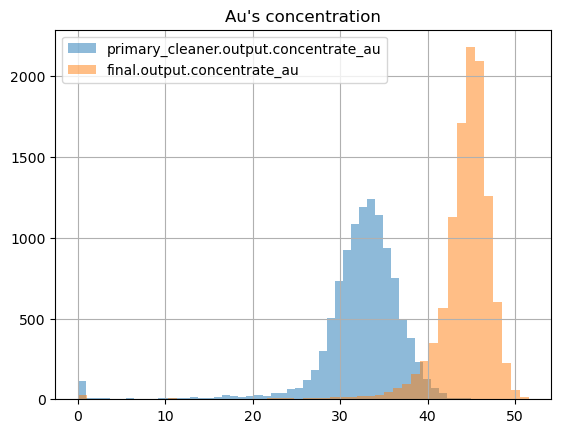

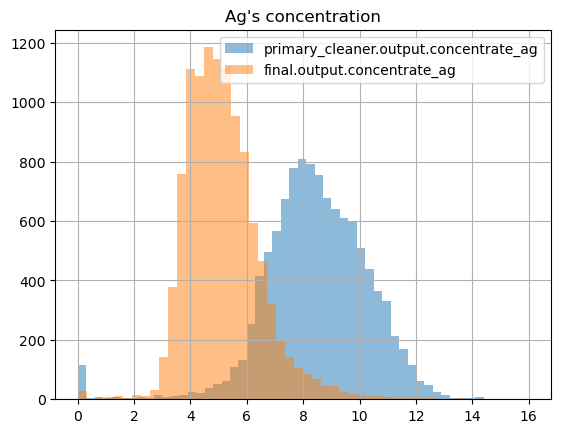

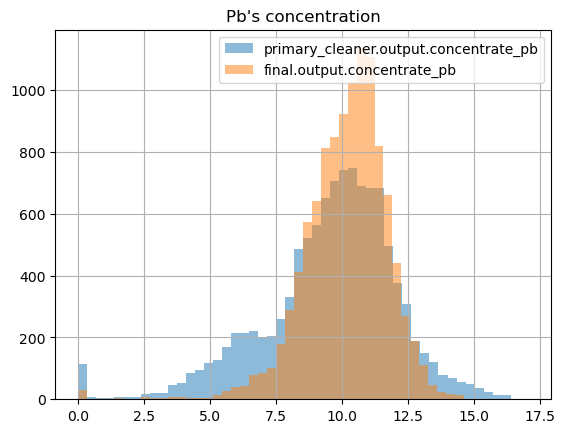

In [314]:
# Graficamos
for m in metals:
    for c in cleaner_stages:
        stage = c+m
        df_train[stage].hist(bins = 50, alpha=0.5, label=stage)
    plt.legend()
    plt.title(f"{m.capitalize()}'s concentration")
    plt.show()

## Analisis de distribucion de particulas de alimentacion <a id='feed_analysis'></a>
Ahora, comparamos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Se observa que las distribuciones no varian significativamente, esto nos indica que el modelo puede entrenarse correctamente.

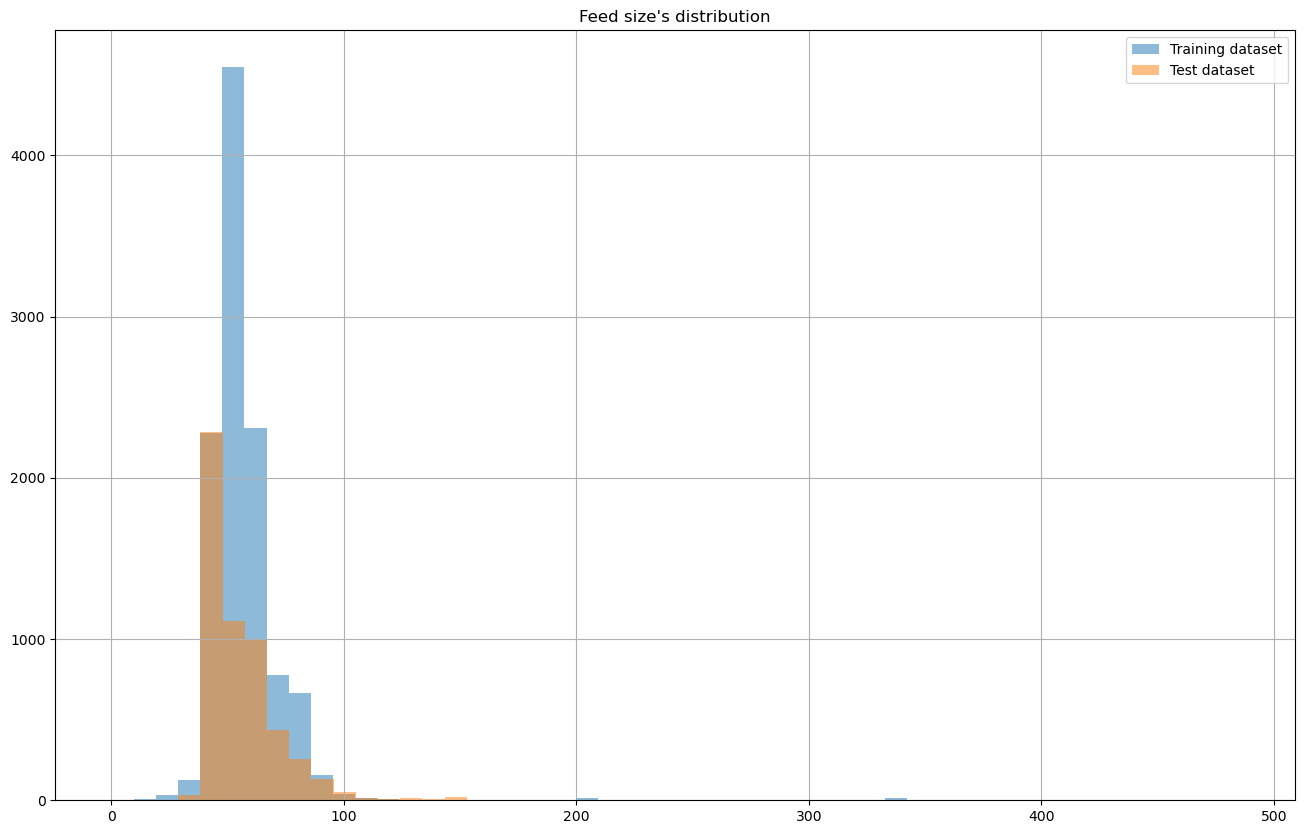

In [315]:
plt.figure(figsize=(16,10))
df_train['rougher.input.feed_size'].hist(bins = 50, alpha=0.5, label = 'Training dataset')
df_test['rougher.input.feed_size'].hist(bins = 50, alpha=0.5, label = 'Test dataset')
plt.title("Feed size's distribution")
plt.legend()
plt.show()

## Analisis de valores anomalos en cada etapa <a id='rare_values_analysis'></a>
A continuacion, a traves de histogramas validamos las concentraciones totales de las sustencias en cada etapa: materia prima, concentrado rougher y concentrado final.

In [316]:
stages = ["rougher.input.feed_","rougher.output.concentrate_","final.output.concentrate_"]

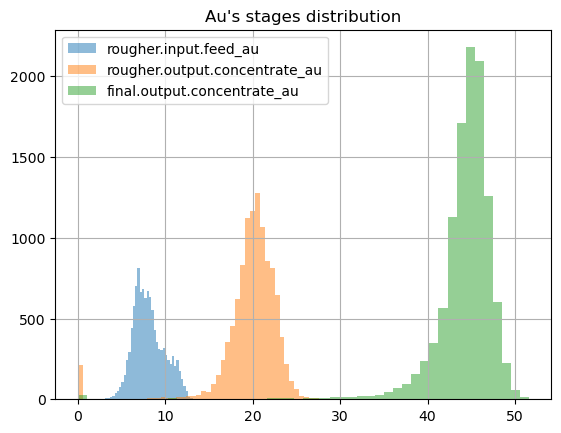

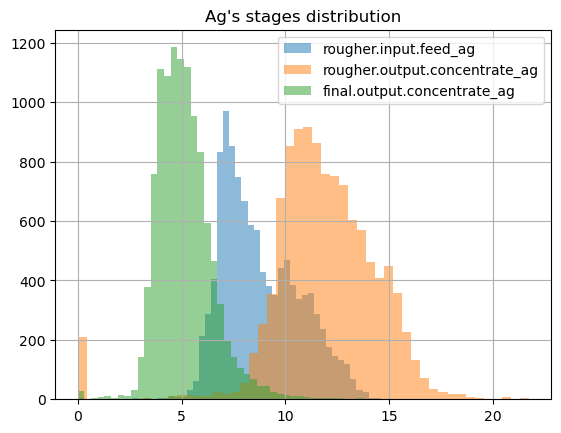

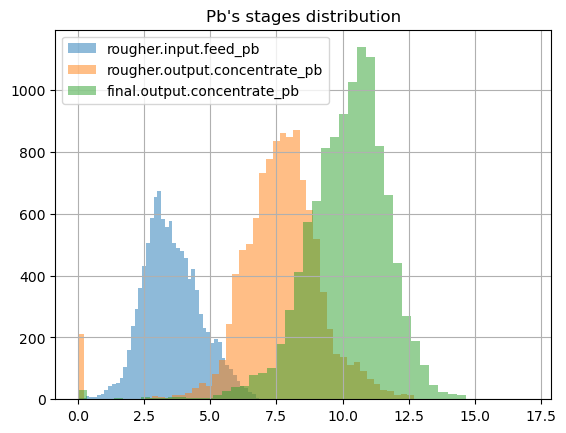

In [317]:
for m in metals:
    for s in stages:
        stage = s+m
        df_train[stage].hist(bins = 50, alpha=0.5, label=stage)
    plt.legend()
    plt.title(f"{m.capitalize()}'s stages distribution")
    plt.show()

Seguidamente, graficamos unos boxplots donde se pueden observar valores anomalos en cada etapa, especialmente en el metal oro el cual tiene la mayor concentracion en la etapa final de purificacion.

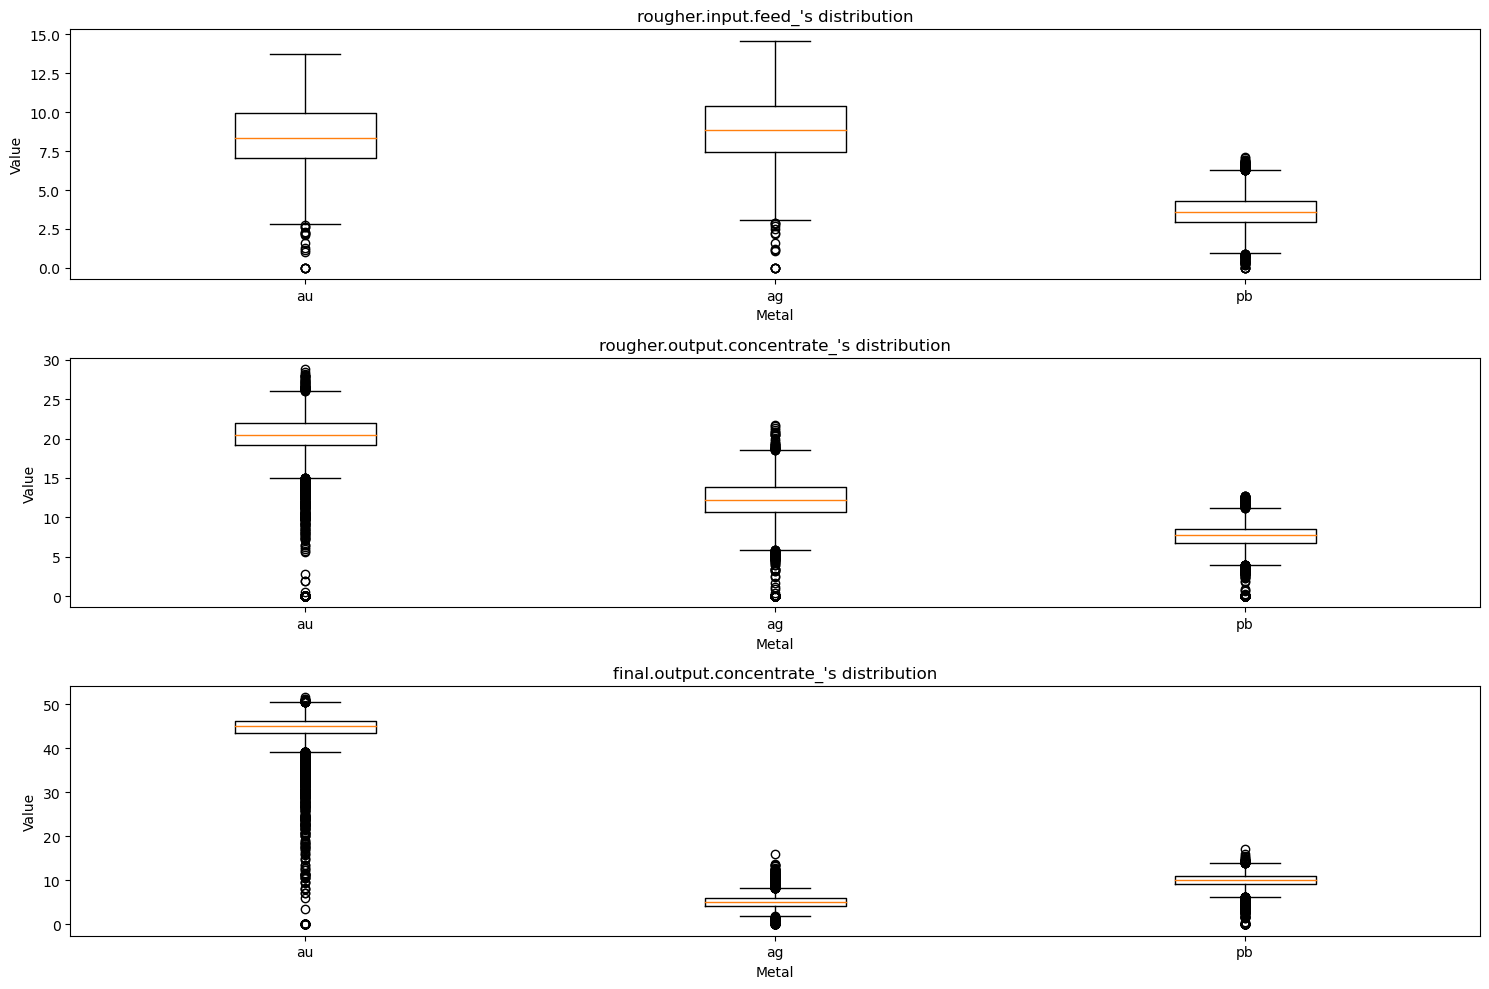

In [319]:
# Distribucion de cada metal por etapa
fig, axes = plt.subplots(nrows=len(stages), ncols=1, figsize=(15, 10))

for i, stage in enumerate(stages):
    data_to_plot = [df_full[stage + m] for m in metals]
    axes[i].boxplot(data_to_plot, labels=metals, showfliers=True)
    axes[i].set_title(f"{stage}'s distribution")
    axes[i].set_xlabel("Metal")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

A continuacion, procedemos a depurar los valores anomalos en funcion al rango intercuartilico (IQR).

In [321]:
# Creamos un diccionario que almacene los limites inferior y superior de cada columna segun el rango intercuartilico

limits = {}

for m in metals:
    for s in stages:
        columns = s + m
        Q1 = df_full[columns].quantile(0.25)
        Q3 = df_full[columns].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        limits[columns] = [lower_limit, upper_limit]

print(limits)

{'rougher.input.feed_au': [2.7912965906178844, 14.228549206905052], 'rougher.output.concentrate_au': [14.981896326998442, 26.078015457796585], 'final.output.concentrate_au': [39.19709210322404, 50.488004613404826], 'rougher.input.feed_ag': [2.9700624239386046, 14.855169383986176], 'rougher.output.concentrate_ag': [5.908062972989657, 18.591329081119138], 'final.output.concentrate_ag': [1.8530807217187695, 8.318789717697861], 'rougher.input.feed_pb': [0.9121784762375884, 6.288392787757848], 'rougher.output.concentrate_pb': [3.9762666432437905, 11.231496827310828], 'final.output.concentrate_pb': [6.211993038853012, 13.921833949022822]}


In [322]:
# Guardamos los datasets sin valores anomalos
for i,limit in enumerate (limits):
    df_full= df_full[(df_full[limit]>limits[limit][0]) & (df_full[limit]<limits[limit][1])]
    df_train= df_train[(df_train[limit]>limits[limit][0]) & (df_train[limit]<limits[limit][1])]
    

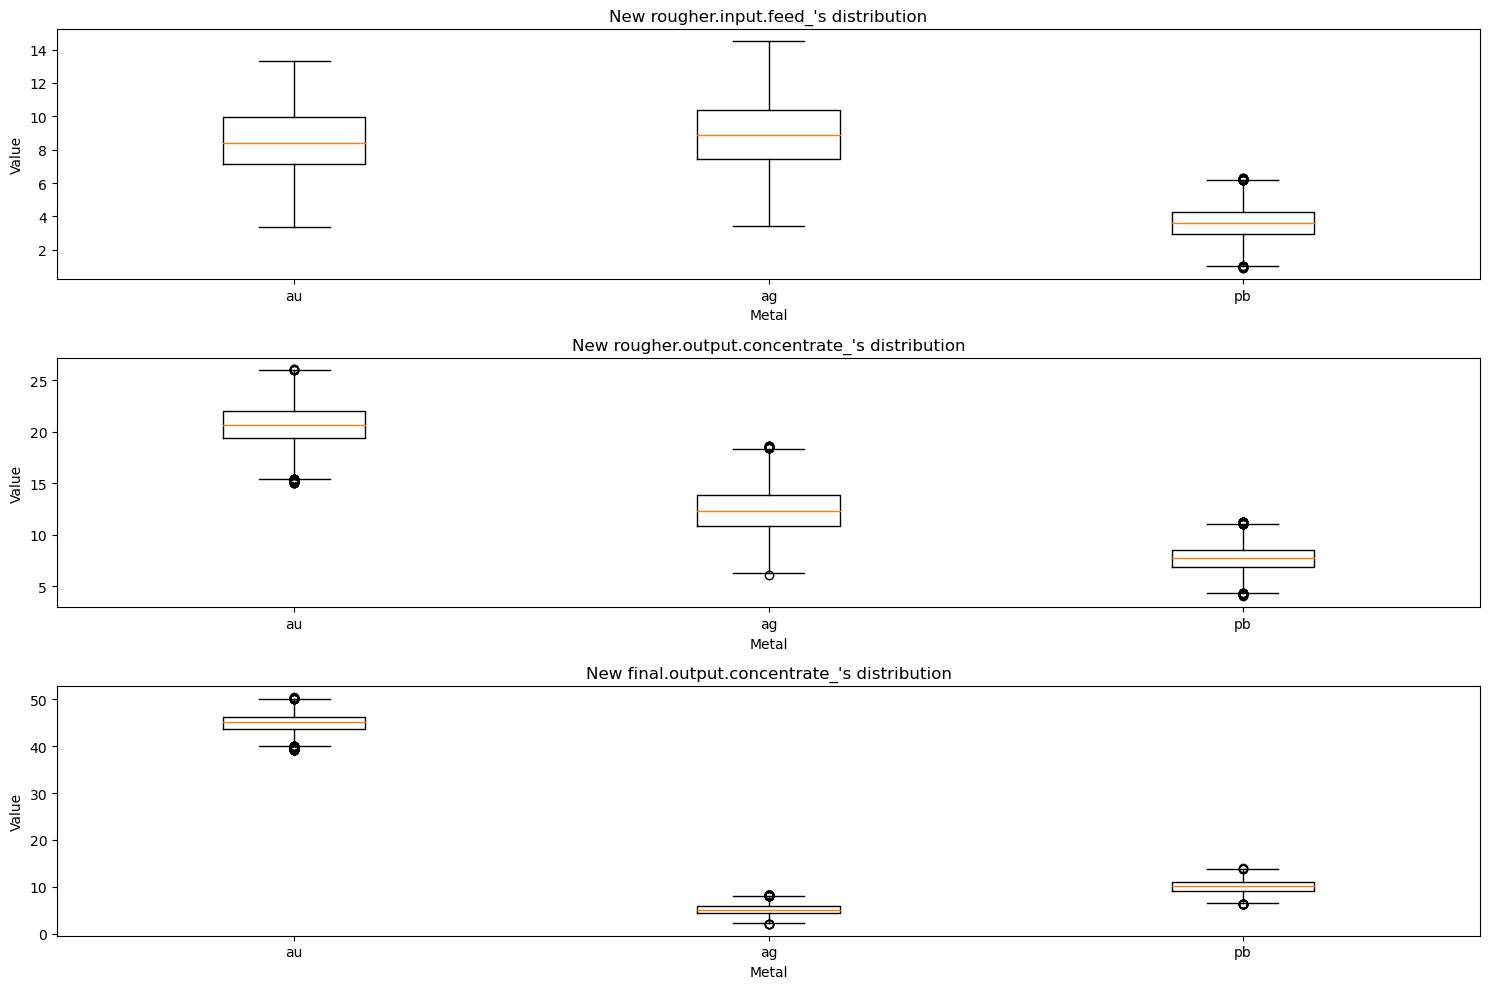

In [323]:
# Distribucion de cada metal por etapa sin valores anomalos
fig, axes = plt.subplots(nrows=len(stages), ncols=1, figsize=(15, 10))

for i, stage in enumerate(stages):
    data_to_plot = [df_full[stage + m] for m in metals]
    axes[i].boxplot(data_to_plot, labels=metals, showfliers=True)
    axes[i].set_title(f"New {stage}'s distribution")
    axes[i].set_xlabel("Metal")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

# Preparacion para entrenamiento <a id='prep_train'></a>
En esta etapa preparamos las funciones que necesitaremos para la siguiente etapa donde validaremos los modelos para encontrar el mejor de todos.

## Calculo de Error Medio Absoluto Simetrico (sMAPE) <a id='smape_estimation'></a>

In [325]:
# Definimos la funcion para el calculo de sMAPE
def smape (y,y_preds):
    smape = np.mean((np.abs(y - y_preds))/((np.abs(y) + np.abs(y_preds))/2))*100
    return smape

## Homologacion de columnas de conjunto de pruebas <a id='test_columns'></a>
En esta seccion completamos el dataset de pruebas con los valores de las columnas que le faltan que obtenemos del conjunto de datos original `df_full`.

In [326]:
# Completamos el dataset de prueba df_test con las columnas faltantes a partir de df_full
df_test = df_full[df_full['date'].isin(df_test['date'])]
df_test.shape

(4604, 87)

## Definicion de variables y segmentacion de datos <a id='variables_split'></a>
Definimos las variables caracteristicas y objetivos:
- Target: 'rougher.output.recovery','final.output.recovery'
- Features: Todas las columnas excepto 'date' y las variables objetivos.

Luego, segmentamos los datos en 4 conjuntos:
- Entrenamiento 75%
- Validacion 25%

In [327]:
#Definimos las variables target y caracteristicas
features = df_train.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
target = df_train[['rougher.output.recovery','final.output.recovery']]

In [328]:
# Segmentacion de datos
x_train,x_valid,y_train,y_valid = train_test_split(features,target,test_size=0.25, random_state=12345)

In [330]:
print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)

(7205, 84) (7205, 2) (2402, 84) (2402, 2)


# Validacion cruzada <a id='rcross_validation'></a>
Definimos una funcion que realice la validacion cruzada de nuestros modelos en 5 iteraciones, ademas, calcule el valor sMAPE final de los 2 objetivos.

In [359]:
# Funcion de validacion cruzada
def cross_validation (model, x_train, y_train, x_valid, y_valid):
    
    list_smapes_rougher = []
    list_smapes_final = []

    score = cross_val_score(model, x_train, y_train, cv=5)
    model.fit(x_train, y_train)
    scores = score.mean()
    model_preds = model.predict(x_valid)
    preds_rougher_r = model_preds[:,0]
    preds_final_r = model_preds[:,1]

    smape_rougher_r = smape(y_valid['rougher.output.recovery'],preds_rougher_r)
    smape_final_r = smape(y_valid['final.output.recovery'],preds_final_r)

    list_smapes_rougher.append(smape_rougher_r)
    list_smapes_final.append(smape_final_r)

    final_smape = np.mean(list_smapes_rougher)*0.25 + np.mean(list_smapes_final)*0.75

    return scores,final_smape

## Decision Tree Regressor <a id='decision_tree'></a>
Aplicamos la validacion cruzada en este modelo buscando el mejor hiperparametro de `max_depth`. 

El tiempo que tomo realizar esto fue de casi 8 segundos.

In [361]:
depth = [2,4,10,25]

for dp in depth:
    model_tree = DecisionTreeRegressor(max_depth=dp, random_state=12345)
    scores,final_smape = cross_validation (model_tree, x_train, y_train, x_valid, y_valid)
    print(f"""
Max_depth: {dp} 
          - score's mean: {scores}
          - final smape: {final_smape}
""")


Max_depth: 2 
          - score's mean: 0.41237405818770634
          - final smape: 6.074630557897185


Max_depth: 4 
          - score's mean: 0.6265857550806377
          - final smape: 4.931446679820754


Max_depth: 10 
          - score's mean: 0.8800700607960451
          - final smape: 2.555120228893984


Max_depth: 25 
          - score's mean: 0.8853260584015473
          - final smape: 2.407981979094184



Se observa que el mejor modelo de decision tree regressor es el que tiene la mejor exactitud y el mejor porcentaje de error:

Max_depth: 25 
- Exactitud: 0.8853260584015473
- % smape: 2.407981979094184

## Random Forest Regressor <a id='random_forest'></a>
Aplicamos la validacion cruzada en este modelo buscando el mejor hiperparametro de `n_estimators`. 

El tiempo que tomo realizar esto fue de un poco mas de **10 minutos**.

In [363]:
# Calculo toma 10 minutos

n_estim = [4,10,25,50,100]

for e in n_estim:
    model_forest = RandomForestRegressor(n_estimators=e, random_state=12345)
    scores,final_smape = cross_validation (model_forest, x_train, y_train, x_valid, y_valid)
    print(f"""
Max_depth: {e} 
          - score's mean: {scores}
          - final smape: {final_smape}
""")


Max_depth: 4 
          - score's mean: 0.9361081296554685
          - final smape: 1.7065785510170413


Max_depth: 10 
          - score's mean: 0.9523237054780831
          - final smape: 1.3629157177579194


Max_depth: 25 
          - score's mean: 0.9588777311434763
          - final smape: 1.2316584229492094


Max_depth: 50 
          - score's mean: 0.9606087706925083
          - final smape: 1.1728206538433545


Max_depth: 100 
          - score's mean: 0.961231959193331
          - final smape: 1.1478817176722815



Se observa que el mejor modelo de randome forest regressor es el que tiene la mejor exactitud y el mejor porcentaje de error:

n_estimators: 100 
- Exactitud: 0.961231959193331
- % smape: 1.1478817176722815

## Linear Regressor <a id='linear_regressor'></a>
Aplicamos la validacion cruzada en este modelo. 

In [366]:
model_linear = LinearRegression()
scores,final_smape = cross_validation (model_linear, x_train, y_train, x_valid, y_valid)
print(f"""
- score's mean: {scores}
- final smape: {final_smape}
""")


- score's mean: 0.9555684422910697
- final smape: 1.3705225116420934



Se observa que el modelo de linear regressor nos da los siguientes resultados de exactitud y porcentaje de error:
 
- Exactitud: 0.9555684422910697
- % smape: 1.3705225116420934

## Conclusion <a id='review_2'></a>
El mejor modelo encontrado a travez de la tecnica de validacion cruzada es **Random Forest Regressor**: 
- Exactitud: 96%

# Entrenamos el mejor modelo <a id='model_train'></a>
Una vez encontrado el mejor modelo con hiperparametros a traves de la validacion cruzada, procedemos a entrenarlo de la manera tradicional para calcular el menor porcentaje de error SMAPE. 

In [367]:
best_model = RandomForestRegressor(n_estimators=100, random_state=12345)
best_model.fit(x_train, y_train)
score = best_model.score(x_valid,y_valid)
model_preds = best_model.predict(x_valid)
preds_rougher_r = model_preds[:,0]
preds_final_r = model_preds[:,1]

smape_rougher_r = smape(y_valid['rougher.output.recovery'],preds_rougher_r)
smape_final_r = smape(y_valid['final.output.recovery'],preds_final_r)

final_smape = smape_rougher_r*0.25 + smape_final_r*0.75

print(f"""Metrics: 
          - score: {score}
          - final smape: {final_smape}
        """)


Metrics: 
          - score: 0.9662750650671399
          - final smape: 1.1478817176722815
        


# Probamos el mejor modelo  <a id='test_model'></a>
A continuacion, validamos los resultados probando nuestro modelo en el conjunto de pruebas `df_test`.

In [371]:
# Segmentamos los datos en target y features
x_test = df_test.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
y_test = df_test[['rougher.output.recovery','final.output.recovery']]

In [372]:
score_test = best_model.score(x_test,y_test)
model_preds_test = best_model.predict(x_test)
preds_rougher_test = model_preds_test[:,0]
preds_final_test = model_preds_test[:,1]

smape_rougher_test = smape(y_test['rougher.output.recovery'],preds_rougher_test)
smape_final_test = smape(y_test['final.output.recovery'],preds_final_test)

final_smape = smape_rougher_test*0.25 + smape_final_test*0.75

print(f"""Metrics: 
          - score: {score}
          - final smape: {final_smape}
        """)

Metrics: 
          - score: 0.9662750650671399
          - final smape: 1.6785135854594957
        


# Prediccion de la recuperacion de oro <a id='prediction_review'></a>
- En la etapa de flotacion, la concentracion de oro recuperado se predice ser de 87%.
- En la etapa final, la concentracion de oro recuperado se predice ser de 69%. 

In [381]:
# Prediccion de la recuperacion de oro extraido en la etapa 
preds_rougher_test.mean(), preds_final_test.mean()

(86.91780617896491, 68.84785444502761)

In [382]:
df_full['rougher.output.recovery'].mean(), df_full['final.output.recovery'].mean()

(85.20251530257076, 67.89266542298802)

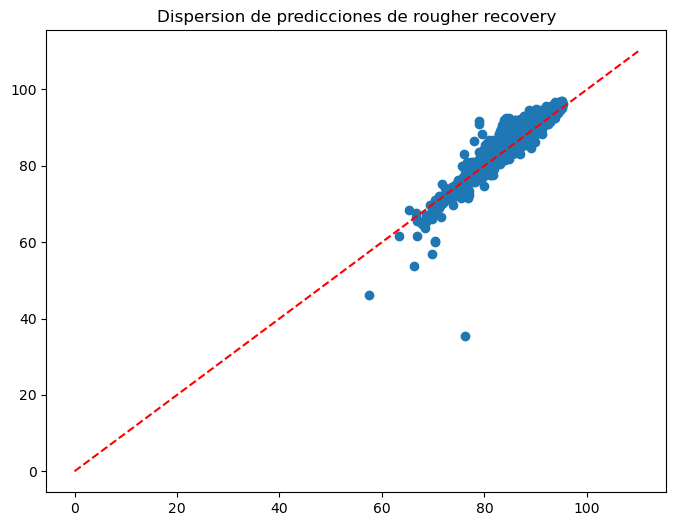

In [404]:
plt.figure(figsize=(8, 6))
plt.scatter(x=preds_rougher_test, y=y_test['rougher.output.recovery'])
plt.plot([0, 110], [0 , 110], color="red", ls="--")
plt.title("Dispersion de predicciones de rougher recovery")
plt.show()

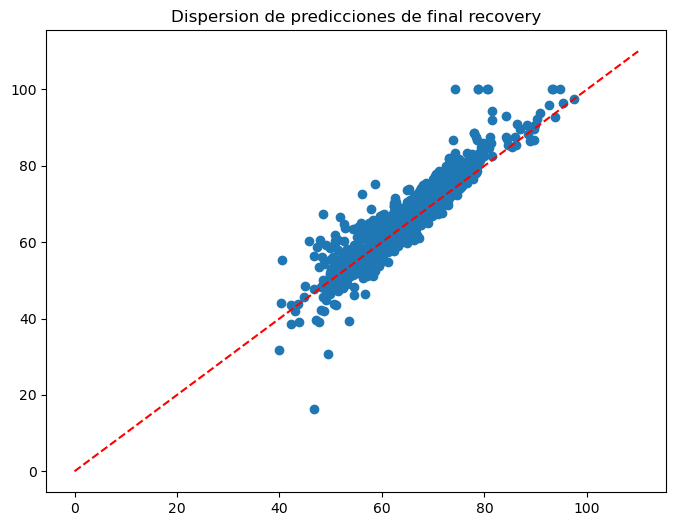

In [403]:
plt.figure(figsize=(8, 6))
plt.scatter(x=preds_final_test, y=y_test['final.output.recovery'])
plt.plot([0, 110], [0 , 110], color="red", ls="--")
plt.title("Dispersion de predicciones de final recovery")
plt.show()

# Conclusiones <a id='end'></a>

1. En la etapa de inicializacion del proyecto, se revisaron los 3 datasets entregados donde se encontraron algunas observaciones respecto a valores ausentes en todos los datasets y cantidad de columnas en el de prueba. Estos puntos fueron tratados en la etapa de procesamiento donde se tomo la decision de eliminar los valores ausentes con el proposito de mantener integros los datos y asi evitar la propagacion de errores.
2. En la etapa de analisis, se valido la distribucion de las concentraciones de los metales de oro, plata y plomo en diferentes etapas de proceso y concentracion, siendo el oro el que tiene mayores valores.
3. Seguidamente, en la preparacion de datos se definieron las variables objetivos que eran 2 y caracteristicas, ademas, se homologo las columnas faltantes en el conjunto de prueba y se creo la funcion para el calculo del error medio absoluto simetrico.
4. Se aplico la tecnica de validacion cruzada para encontrar el mejor modelo e hiperparametro de entrenamiento, pasando por decision tree regressor, random forest regressor y lineal regressor. El mejor resultado de exactitud y sMAPE se encontro en el modelo random forest regressor con 100 estimadores.
5. Por ultimo, se entreno nuevamente el modelo (sin validacion cruzada) en el conjunto de pruebas y luego paso por el conjunto de pruebas dandonos el valor de exactitud en ambos conjuntos: 96%.
6. Finalmente, el modelo predice que la recuperacion final de oro extraido sera:
    - En la etapa de flotacion, la concentracion de oro recuperado se predice ser de 87%.
    - En la etapa final, la concentracion de oro recuperado se predice ser de 69%. 